In [1]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# 10k simulations of 10^6 populations

In [2]:
%%time
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0

refPops = run_simulations(10000, l, q, qfac, alpha, selection=0)

print(len(refPops))

Populations simulated: 100
Populations simulated: 200
Populations simulated: 300
Populations simulated: 400
Populations simulated: 500
Populations simulated: 600
Populations simulated: 700
Populations simulated: 800
Populations simulated: 900
Populations simulated: 1000
Populations simulated: 1100
Populations simulated: 1200
Populations simulated: 1300
Populations simulated: 1400
Populations simulated: 1500
Populations simulated: 1600
Populations simulated: 1700
Populations simulated: 1800
Populations simulated: 1900
Populations simulated: 2000
Populations simulated: 2100
Populations simulated: 2200
Populations simulated: 2300
Populations simulated: 2400
Populations simulated: 2500
Populations simulated: 2600
Populations simulated: 2700
Populations simulated: 2800
Populations simulated: 2900
Populations simulated: 3000
Populations simulated: 3100
Populations simulated: 3200
Populations simulated: 3300
Populations simulated: 3400
Populations simulated: 3500
Populations simulated: 3600
P

In [3]:
%%time
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0.3

refSelPops = run_simulations(10000, l, q, qfac, alpha, selection=0.3)

print(len(refSelPops))

Populations simulated: 100
Populations simulated: 200
Populations simulated: 300
Populations simulated: 400
Populations simulated: 500
Populations simulated: 600
Populations simulated: 700
Populations simulated: 800
Populations simulated: 900
Populations simulated: 1000
Populations simulated: 1100
Populations simulated: 1200
Populations simulated: 1300
Populations simulated: 1400
Populations simulated: 1500
Populations simulated: 1600
Populations simulated: 1700
Populations simulated: 1800
Populations simulated: 1900
Populations simulated: 2000
Populations simulated: 2100
Populations simulated: 2200
Populations simulated: 2300
Populations simulated: 2400
Populations simulated: 2500
Populations simulated: 2600
Populations simulated: 2700
Populations simulated: 2800
Populations simulated: 2900
Populations simulated: 3000
Populations simulated: 3100
Populations simulated: 3200
Populations simulated: 3300
Populations simulated: 3400
Populations simulated: 3500
Populations simulated: 3600
P

# Analyses

In [13]:
def get_max_AFs(populations, det_lim=1):
    '''Returns an array containing the maximum subclone allele frequencies from a given set of populations
        Uses the final_data() function from ThesisScripts.Analyses to get the allele frequencies
        Option to set a detection limit (det_lim, default 1)'''
    max_afs = np.empty(len(populations))

    for i in range(len(populations)):
        data = final_data(populations[i])
        mutations = data.loc[data['Family size'] >= det_lim].iloc[1:]
        max_af = mutations['Allele frequency'].max()
        max_afs[i] = max_af
    
    return max_afs

In [14]:
def get_heterogeneity(populations, det_lim=1):
    '''Returns an array containing the Simpson's diversity indices of the given populatons, calculated by
        the heterogeneity() function
        Option to set a detection limit (det_lim=1)'''
    
    h_arr = np.empty(len(populations))
    
    for i in range(len(populations)):
        h = heterogeneity(populations[i], det_lim=det_lim)
        h_arr[i] = h
        
    return h_arr

## Max Allele frequencies

In [15]:
%%time
ref_MaxAFs = get_max_AFs(refPops, det_lim=100)
refSel_MaxAFs = get_max_AFs(refSelPops, det_lim=100)

CPU times: user 3min 59s, sys: 1min 3s, total: 5min 3s
Wall time: 6min 38s


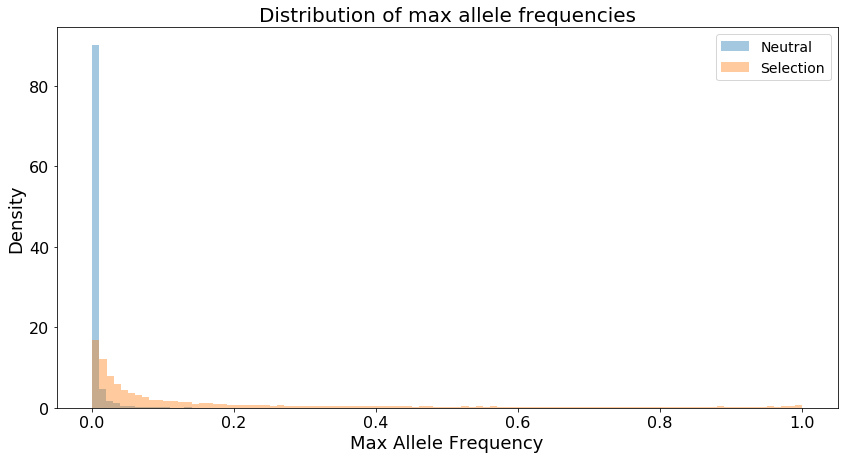

In [31]:
sns.distplot(ref_MaxAFs, bins=100, norm_hist=True, kde=False, label="Neutral");
sns.distplot(refSel_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Frequency');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/MultiSim-Ref-10k_sim/Ref-MaxAFs.png');
plt.show()

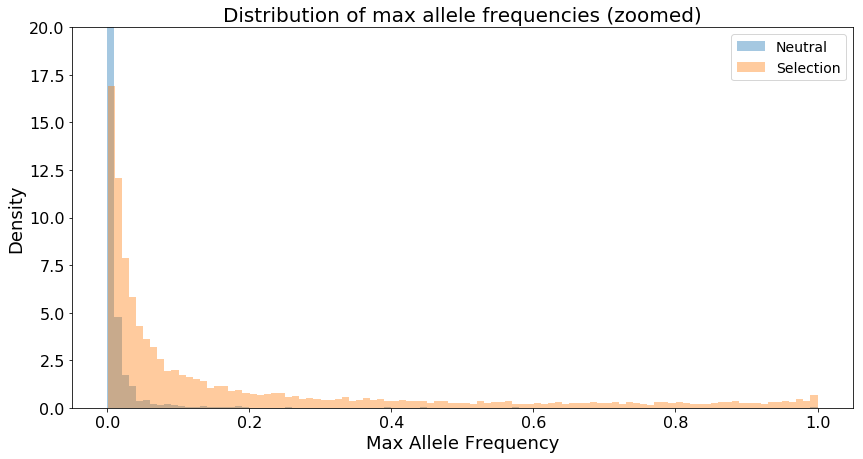

In [33]:
sns.distplot(ref_MaxAFs, bins=100, norm_hist=True, kde=False, label="Neutral");
sns.distplot(refSel_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution of max allele frequencies (zoomed)');
plt.xlabel('Max Allele Frequency');
plt.ylabel('Density');
plt.ylim(0, 20);
plt.legend();
plt.savefig('./Figures/MultiSim-Ref-10k_sim/Ref-MaxAFs_zoomed.png');
plt.show()

## Heterogeneity

In [16]:
%%time
ref_H = get_heterogeneity(refPops, det_lim=100)
refSel_H = get_heterogeneity(refSelPops, det_lim=100)

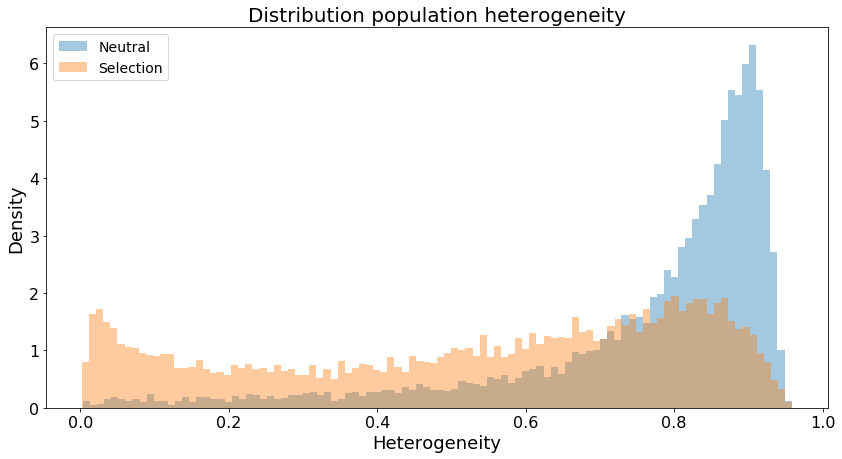

In [28]:
sns.distplot(ref_H, bins=100, norm_hist=True, kde=False, label="Neutral");
sns.distplot(refSel_H, bins=100, norm_hist=True, kde=False, label="Selection");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Ref-10k_sim/Ref-Heterogeneity.png')
plt.show()

## Export data

In [19]:
%%time
d = pd.DataFrame()
d["ref_MaxAFs"] = ref_MaxAFs
d["refSel_MaxAFs"] = refSel_MaxAFs
d["ref_H"] = ref_H
d["refSel_H"] = refSel_H

d.to_csv('./simulation_data/ref-10k_sim-data.csv')

CPU times: user 115 ms, sys: 45.1 ms, total: 160 ms
Wall time: 227 ms


In [18]:
d.head()

,ref_MaxAFs,refSel_MaxAFs,ref_H,refSel_H
0,0.001441,0.237916,0.809323,0.247402
1,0.017594,0.512455,0.638373,0.103949
2,0.008378,0.474378,0.615498,0.022679
3,0.000331,0.045359,0.913069,0.625023
4,0.000503,0.136106,0.905242,0.509918
